In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
import json
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
import umap

In [117]:
with open(r"./config/tree.json") as f:
    tree = json.load(f)
len(tree)


1327

In [118]:
def ct_ccf_sort(ctlist):
    ctlist = [x.replace("23","2/3") for x in ctlist]
    select_ct_sorted = []
    for item in tree:
        if item["acronym"] in ctlist:
            select_ct_sorted.append(item["acronym"])
    return select_ct_sorted

In [119]:
used_cols = ["Center Shift","Relative Center Shift",
         "Average Contraction",  "Average Bifurcation Angle Remote","Average Bifurcation Angle Local",
         "Max Branch Order","Number of Bifurcations","Total Length",
         "Max Euclidean Distance","Max Path Distance","Average Euclidean Distance","25% Euclidean Distance",
         "50% Euclidean Distance","75% Euclidean Distance", "Average Path Distance","25% Path Distance","50% Path Distance","75% Path Distance",       
         '2D Density', '3D Density',
         'Area', 'Volume', 'Width',  'Width_95','Height', 'Height_95', 'Depth', 'Depth_95', 
         'Slimness', 'Slimness_95', 'Flatness', 'Flatness_95']

In [120]:
material_path = r"E:\ZhixiYun\Projects\Neuron_Morphology_Table\Materials"
df_ct = pd.concat([pd.read_csv(os.path.join(material_path,"cell_type/s_type","AIBS+SEU-ALLEN_Full_1741.csv"), index_col=0), 
                   pd.read_csv(os.path.join(material_path,"cell_type/s_type","MouseLight_Full_1200.csv"), index_col=0), 
                   pd.read_csv(os.path.join(material_path,"cell_type/s_type","ION_Axon_6357.csv"), index_col=0)
                  ])
df_ct.index = [x.replace('.semi_r','').replace('.auto_r','').replace('.semi_f','') for x in df_ct.index]


df_axon = pd.read_csv(os.path.join(material_path, 'morphology_feature/', 'Axon_Morphological_Features.csv'),index_col=0)
df_axon.index = [x.replace('.semi_r','').replace('.auto_r','').replace('.semi_f','') for x in df_axon.index]

df_axon = df_axon[used_cols]


In [121]:
df_den = pd.read_csv(os.path.join(material_path, 'morphology_feature/', 'Dendrite_Morphological_Features.csv'),index_col=0)
df_den = df_den[~df_den.index.str.contains('^Img')]
df_den.index = [x.replace('.semi_r','').replace('.auto_r','').replace('.semi_f','') for x in df_den.index]

df_den.dropna(inplace=True)
df_den = df_den[used_cols]


In [122]:
df_full = pd.concat([df_axon,df_den],axis=1)
df_full.columns = ['A_'+x for x in df_axon]+['D_'+x for x in df_den]
df_full.dropna(how='any',inplace=True)

In [123]:
for ind in df_ct.index:
    dct = df_ct.loc[ind, 'Detail CellType']
    if dct.find('SSp')!=-1:
        if dct.find("2/3")!=-1:
            dct = 'SSp2/3'
        elif dct.find("1")!=-1:
            dct = 'SSp1'
        elif dct.find("4")!=-1:
            dct = 'SSp4'
        elif dct.find("5")!=-1:
            dct = 'SSp5'
        elif dct.find("6a")!=-1:
            dct = 'SSp6a'
        elif dct.find("6b")!=-1:
            dct = 'SSp6b'
        else:
            dct = 'SSp'
        df_ct.loc[ind, 'Detail CellType'] = dct

In [124]:
select_fn = ["Center Shift","Relative Center Shift",
         "Average Contraction",  "Average Bifurcation Angle Remote","Average Bifurcation Angle Local",
         "Max Branch Order","Number of Bifurcations","Total Length",
         "Max Euclidean Distance","Max Path Distance","Average Euclidean Distance","25% Euclidean Distance",
         "50% Euclidean Distance","75% Euclidean Distance", "Average Path Distance","25% Path Distance","50% Path Distance","75% Path Distance",       
         '2D Density', '3D Density',
         'Area', 'Volume', 'Width',  'Width_95','Height', 'Height_95', 'Depth', 'Depth_95', 
         'Slimness', 'Slimness_95', 'Flatness', 'Flatness_95']

select_fn_pcabiplot = ["Center Shift","Relative Center Shift",
        "Average Bifurcation Angle Remote",
         "Max Branch Order","Number of Bifurcations","Total Length",
         "Max Euclidean Distance","Max Path Distance",
         '2D Density', '3D Density',
         'Area', 'Volume',
         'Slimness', 'Flatness']

In [125]:
# fullmorpholist=[]
# for i in ctlist:
#     aa=df_ct[df_ct['Detail CellType']==i].index
#     nb=False
#     for j in aa:
#         if not (j in df_den.index and j in df_axon.index):
#             nb=True
#             break
#     if not nb:
#         fullmorpholist.append(i)
# fullmorpholist = ['SSp5','SUB','CP','VPL','VPM','LGd']
# ctlist = ct_ccf_sort(np.unique(df_ct['Detail CellType']))
df_dct_v_c = df_ct['Detail CellType'].value_counts()
ctlist = ct_ccf_sort(list(df_dct_v_c[df_dct_v_c>60].index))
len(ctlist)
ctlist
# fullmorpholist

['FRP5',
 'MOs2/3',
 'MOs5',
 'MOs6a',
 'SSp5',
 'ACAd2/3',
 'ACAd5',
 'ACAd6a',
 'ACAv2/3',
 'ACAv5',
 'PL2/3',
 'PL5',
 'PL6a',
 'ILA5',
 'ORBl2/3',
 'ORBl5',
 'ORBm2/3',
 'ORBm5',
 'ORBvl1',
 'ORBvl2/3',
 'ORBvl5',
 'ORBvl6a',
 'AId2/3',
 'AId5',
 'AIv2/3',
 'AIv5',
 'SUB',
 'CP',
 'VPL',
 'VPM',
 'LGd']

In [126]:
df_ct['Detail CellType'].value_counts().loc[ct_ccf_sort(list(df_ct['Detail CellType'].value_counts().index))].head(60)

root           3
FRP1          20
FRP2/3        41
FRP5          75
FRP6a         25
FRP6b          1
MOp1           6
MOp2/3        29
MOp5          46
MOp6a         13
MOs1          53
MOs2/3       297
MOs5         481
MOs6a        145
MOs6b          1
SSp            5
SSp2/3        26
SSp4          34
SSp5         169
SSp6a          8
SSs2/3        13
SSs4           5
SSs5          35
SSs6a          3
GU5            2
VISC5          5
AUDd4          1
AUDd5          2
AUDp2/3        4
AUDp4          1
AUDp5          1
AUDv2/3        1
AUDv5          2
AUDv6a         1
VISal2/3       3
VISal5         3
VISam2/3       4
VISl2/3        3
VISl4          1
VISl5          2
VISl6a         5
VISl6b         2
VISp           1
VISp2/3       16
VISp4         11
VISp5         11
VISp6a         4
VISp6b         4
VISpm2/3       1
VISpm5         1
VISli2/3       1
VISli5         1
VISli6a        1
VISpor2/3      2
ACAd1         23
ACAd2/3      189
ACAd5        458
ACAd6a       125
ACAv1         

In [127]:
import glob
df_overlap = pd.DataFrame()
for ct in ctlist:
    csvpath = glob.glob(os.path.join(r'E:\ZhixiYun\Projects\Neuron_Morphology_Table\linus\stypes_flipped\csv\layer',
                                     '{}*'.format(ct.replace('2/3','23'))))[0]
    tmpdf = pd.read_csv(csvpath,index_col=0)
    tmpdf = tmpdf.dropna(how='all',axis=0)
    tmpdf['celltype'] = ct
    df_overlap = pd.concat([df_overlap,tmpdf])
    
df_overlap = df_overlap.dropna(how='all',axis=1)
# remove the neurons which have non-overlap connections. 20230422
df_overlap = df_overlap.fillna(0)
tmpseries = df_overlap['celltype']
del df_overlap['celltype']
df_overlap = (df_overlap+1).apply(np.log)
# df = (df.T/(df.T.sum(axis=0)+1e-20)).T
df_overlap['celltype'] = tmpseries

In [128]:
# unify the index of each dataframe
unified_indice = []
for tmpdf in [df_overlap,df_ct,df_axon]:
    if len(unified_indice)==0:
        unified_indice = list(tmpdf.index)
    else:
        unified_indice = np.intersect1d(unified_indice,tmpdf.index)

df_ct = df_ct.loc[unified_indice]
df_overlap = df_overlap.loc[unified_indice]
df_axon = df_axon.loc[unified_indice]

len(unified_indice)

6494

# axonal morphological feature similarity score clustermap

In [129]:
def intra_class_distance(f_matrix, metric='cosine'):
    dis_mat = cdist(f_matrix, f_matrix, metric=metric)
    intra_class_score = np.sum(dis_mat) / (len(f_matrix)**2)
    return intra_class_score

def inter_class_distance(f_matrix1, f_matrix2, metric='cosine'):
    dis_mat = cdist(f_matrix1, f_matrix2, metric=metric)
    inter_class_score = np.sum(dis_mat) / (len(f_matrix1)*len(f_matrix2))
    return inter_class_score

In [130]:
score_matrix_morpho = np.zeros((len(ctlist),len(ctlist)), dtype=np.float32)
                        
for i in range(len(ctlist)):
    ct1 = ctlist[i]

    for j in range(len(ctlist)):
        # if i==j: continue
        df1 = df_axon.loc[df_ct[df_ct['Detail CellType']==ctlist[i]].index]

        ct2 = ctlist[j]
        df2 = df_axon.loc[df_ct[df_ct['Detail CellType']==ct2].index]
        # if ct1 in fullmorpholist and ct2 in fullmorpholist: 
        #     df1 = df_full.loc[df_ct[df_ct['Detail CellType']==ct1].index]
        #     df2 = df_full.loc[df_ct[df_ct['Detail CellType']==ct2].index]

        dfconcat = pd.concat([df1, df2])
        vmean = np.mean(dfconcat.values, axis=0)
        vstd = np.std(dfconcat.values, axis=0)
        
        
        # f_matrix1 = df1.values
        # f_matrix2 = df2.values
        
        f_matrix1 = (df1.values - vmean) / vstd
        f_matrix2 = (df2.values - vmean) / vstd
        
        # inter_class_score = inter_class_distance(f_matrix1, f_matrix2)
        # intra_class_score1 = intra_class_distance(f_matrix1)
        # intra_class_score2 = intra_class_distance(f_matrix2)
        
        # score = 2*inter_class_score/(intra_class_score1+intra_class_score2)
        # score = silhouette_score(np.vstack([f_matrix1,f_matrix2]), [0]*len(f_matrix1)+[1]*len(f_matrix2))
        
        inter_class_score = 2*np.sum(np.abs(np.mean(f_matrix1,axis=0) - np.mean(f_matrix2,axis=0)))
        # inter_class_score = cdist(f_matrix1,f_matrix2,metric='cityblock').mean()
        intra_class_score = cdist(f_matrix1, f_matrix1, metric='cityblock').mean()/2+cdist(f_matrix2, f_matrix2, metric='cityblock').mean()/2
        score = np.exp(-inter_class_score/intra_class_score)
        # score = inter_class_score/intra_class_score
        # score = np.exp(-inter_class_score/intra_class_score+1)
        
        score_matrix_morpho[i,j] = score
        


In [131]:
g.ax_heatmap.figure.axes[0].get_ylim()

AttributeError: 'AxesSubplot' object has no attribute 'ax_heatmap'

In [ ]:
# plt.figure(figsize=(17,17))
# sns.heatmap(pd.DataFrame(score_matrix,index=ctlist,columns=ctlist),annot=True,
#             square=True,cmap='coolwarm',cbar_kws={'shrink':0.6}, fmt='.2f')
df_score_matrix_morpho = pd.DataFrame(score_matrix_morpho,index=ctlist,columns=ctlist)
df_score_matrix_morpho.to_csv(r'./fig3/m_score.csv')

g=sns.clustermap(df_score_matrix_morpho,annot=True,annot_kws={'fontsize': 12},cbar=False,
            square=True,cmap='coolwarm', fmt='.2f', method='ward',figsize=(17,17),vmin=0,vmax=1,tree_kws={'linewidth':1.2})
color='yellow'
lw=6
# unflipped
# g.ax_heatmap.add_patch(plt.Rectangle((5,5),10,10,fill=False,lw=lw,color=color,))
# g.ax_heatmap.add_patch(plt.Rectangle((15,15),3,3,fill=False,lw=lw,color=color,))
# g.ax_heatmap.add_patch(plt.Rectangle((21,21),6,6,fill=False,lw=lw,color=color,))
# g.ax_heatmap.add_patch(plt.Rectangle((27,27),4,4,fill=False,lw=lw,color=color,))
# flipped
g.ax_heatmap.add_patch(plt.Rectangle((5,5),10,10,fill=False,lw=lw,color=color,))
g.ax_heatmap.add_patch(plt.Rectangle((15,15),3,3,fill=False,lw=lw,color=color,))
# g.ax_heatmap.add_patch(plt.Rectangle((25,25),3,3,fill=False,lw=lw,color=color,))
g.ax_heatmap.add_patch(plt.Rectangle((21,21),10,10,fill=False,lw=lw,color=color,))
g.ax_heatmap.set_xlim(0,31+0.1)
g.ax_heatmap.set_ylim(31+0.1,0)

g.ax_heatmap.figure.delaxes(g.ax_heatmap.figure.axes[3])  # Deletes the colorbar axis completely

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(),fontsize=18,horizontalalignment='center')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=18,verticalalignment='center')
g_clu=g
plt.savefig('./fig3/pairwise_stype_similarity_clustermap_morpho.svg', dpi=300, bbox_inches='tight',facecolor='w')
plt.show()

# connectivity vector similarity score heatmap

In [ ]:
clustermap_ctlist = [g_clu.ax_heatmap.get_xticklabels()[x].get_text() for x in range(len(ctlist))]
score_matrix_overlap = np.zeros((len(clustermap_ctlist),len(clustermap_ctlist)), dtype=np.float32)
for i in range(len(clustermap_ctlist)):
    ct1 = clustermap_ctlist[i]
    df1 = df_overlap[df_overlap['celltype']==ct1].iloc[:,:-1]
    print(ct1, df1.shape[0])
    for j in range(len(clustermap_ctlist)):
        # if i==j: continue
        

        ct2 = clustermap_ctlist[j]
        df2 = df_overlap[df_overlap['celltype']==ct2].iloc[:,:-1]
        # if ct1 in fullmorpholist and ct2 in fullmorpholist: 
        #     df1 = df_full.loc[df_ct[df_ct['Detail CellType']==ct1].index]
        #     df2 = df_full.loc[df_ct[df_ct['Detail CellType']==ct2].index]

        dfconcat = pd.concat([df1, df2])
        dfconcat[dfconcat==0]=np.nan
        dfconcat.dropna(how='all',axis=1,inplace=True)
        dfconcat.fillna(0,inplace=True)
        vmean = np.mean(dfconcat.values, axis=0)
        vstd = np.std(dfconcat.values, axis=0)
        
        
        # f_matrix1 = df1.values
        # f_matrix2 = df2.values
        
        f_matrix1 = (df1[dfconcat.columns].values - vmean) / vstd
        f_matrix2 = (df2[dfconcat.columns].values - vmean) / vstd
        
        # inter_class_score = inter_class_distance(f_matrix1, f_matrix2)
        # intra_class_score1 = intra_class_distance(f_matrix1)
        # intra_class_score2 = intra_class_distance(f_matrix2)
        
        # score = 2*inter_class_score/(intra_class_score1+intra_class_score2)
        # score = silhouette_score(np.vstack([f_matrix1,f_matrix2]), [0]*len(f_matrix1)+[1]*len(f_matrix2))
        
        inter_class_score = 2*np.sum(np.abs(np.mean(f_matrix1,axis=0) - np.mean(f_matrix2,axis=0)))
        # inter_class_score = cdist(f_matrix1,f_matrix2,metric='cityblock').mean()
        intra_class_score = cdist(f_matrix1, f_matrix1, metric='cityblock').mean()/2+cdist(f_matrix2, f_matrix2, metric='cityblock').mean()/2
        score = np.exp(-inter_class_score/intra_class_score)
        # score = inter_class_score/intra_class_score
        # score = np.exp(-inter_class_score/intra_class_score+1)
        
        score_matrix_overlap[i,j] = score

In [ ]:
df_score_matrix_overlap = pd.DataFrame(score_matrix_overlap,index=clustermap_ctlist,columns=clustermap_ctlist)
df_score_matrix_overlap.to_csv(r'./fig3/c_score.csv')

plt.figure(figsize=(14,14))
g=sns.heatmap(df_score_matrix_overlap,annot=True,annot_kws={'fontsize':12},
            square=True,cmap='coolwarm',cbar=False,cbar_kws={'shrink':0.6,'orientation':'vertical'}, fmt='.2f',vmin=0,vmax=1,)

color='yellow'
lw=6
# unflipped
# g.add_patch(plt.Rectangle((5,5),10,10,fill=False,lw=lw,color=color,))
# g.add_patch(plt.Rectangle((15,15),3,3,fill=False,lw=lw,color=color,))
# g.add_patch(plt.Rectangle((21,21),6,6,fill=False,lw=lw,color=color,))
# g.add_patch(plt.Rectangle((27,27),4,4,fill=False,lw=lw,color=color,))
# flipped
g.add_patch(plt.Rectangle((5,5),10,10,fill=False,lw=lw,color=color,))
g.add_patch(plt.Rectangle((15,15),3,3,fill=False,lw=lw,color=color,))
# g.add_patch(plt.Rectangle((25,25),3,3,fill=False,lw=lw,color=color,))
g.add_patch(plt.Rectangle((21,21),10,10,fill=False,lw=lw,color=color,))
g.set_xlim(0,31+0.1)
g.set_ylim(31+0.1,0)

g.yaxis.set_ticks_position('right')
g.yaxis.set_tick_params(rotation=0)
g.set_xticklabels(g.get_xticklabels(),fontsize=18,horizontalalignment='center')
g.set_yticklabels(g.get_yticklabels(),fontsize=18,verticalalignment='center')

# # Extract the colorbar
# cbar = g.collections[0].colorbar
# # Remove the heatmap axes
# g.figure.delaxes(g)
# cbar.ax.tick_params(labelsize=18)

# plt.tight_layout()
plt.savefig('./fig3/pairwise_stype_similarity_heatmap_connectivity.svg', dpi=300, bbox_inches='tight',facecolor='w')
# plt.savefig('./fig3/pairwise_stype_similarity_heatmap_connectivity_withcbar.svg', dpi=300, bbox_inches='tight',facecolor='w')
plt.show()

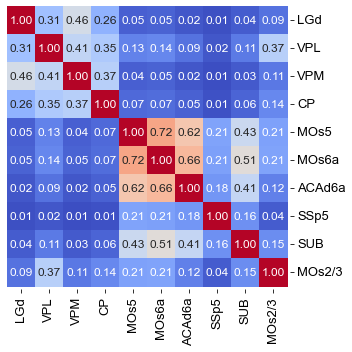

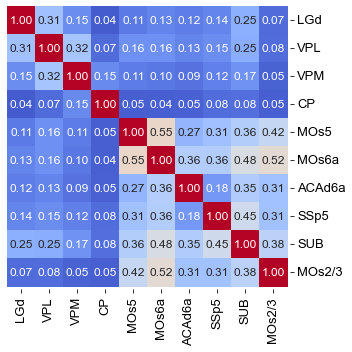

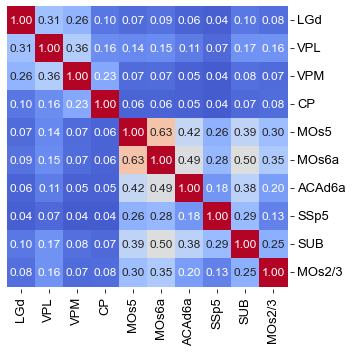

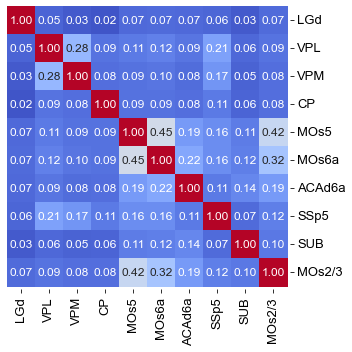

In [132]:
'''add den/full/axon/overlap feature in SFig'''
clustermap_ctlist = [g_clu.ax_heatmap.get_xticklabels()[x].get_text() for x in range(len(ctlist))]
score_matrix_morpho_den = np.zeros((len(clustermap_ctlist),len(clustermap_ctlist)), dtype=np.float32)
score_matrix_morpho_axon = np.zeros((len(clustermap_ctlist),len(clustermap_ctlist)), dtype=np.float32)
score_matrix_morpho_full = np.zeros((len(clustermap_ctlist),len(clustermap_ctlist)), dtype=np.float32)
score_matrix_overlap = np.zeros((len(clustermap_ctlist),len(clustermap_ctlist)), dtype=np.float32)
for tmparr,tmpdf,savename in zip([score_matrix_morpho_den,score_matrix_morpho_axon,score_matrix_morpho_full,score_matrix_overlap],[df_den,df_axon,df_full,df_overlap],['M_D','M_A','M_F','C']):
    for i in range(len(clustermap_ctlist)):
        ct1 = clustermap_ctlist[i]
        ct1_neuron_name = df_den.index
        for tmpindex in [df_axon.index,df_full.index,df_ct[df_ct['Detail CellType']==ct1].index]:
            ct1_neuron_name = np.intersect1d(ct1_neuron_name,tmpindex)
        df1 = tmpdf.loc[ct1_neuron_name]
        # print(ct1, df1.shape[0])
        for j in range(len(clustermap_ctlist)):
            # if i==j: continue

            ct2 = clustermap_ctlist[j]
            ct2_neuron_name = df_den.index
            for tmpindex in [df_axon.index,df_full.index,df_ct[df_ct['Detail CellType']==ct2].index]:
                ct2_neuron_name = np.intersect1d(ct2_neuron_name,tmpindex)
            df2 = tmpdf.loc[ct2_neuron_name]
            # if ct1 in fullmorpholist and ct2 in fullmorpholist: 
            #     df1 = df_full.loc[df_ct[df_ct['Detail CellType']==ct1].index]
            #     df2 = df_full.loc[df_ct[df_ct['Detail CellType']==ct2].index]
            if df1.shape[0]>=10 and df2.shape[0]>=10: 
                
                if savename!='C': dfconcat = pd.concat([df1, df2])
                else: dfconcat = pd.concat([df1, df2]).iloc[:,:-1]
                
                dfconcat[dfconcat==0]=np.nan
                dfconcat.dropna(how='all',axis=1,inplace=True)
                dfconcat.fillna(0,inplace=True)
                vmean = np.mean(dfconcat.values, axis=0)
                vstd = np.std(dfconcat.values, axis=0)


                # f_matrix1 = df1.values
                # f_matrix2 = df2.values

                f_matrix1 = (df1[dfconcat.columns].values - vmean) / vstd
                f_matrix2 = (df2[dfconcat.columns].values - vmean) / vstd

                # inter_class_score = inter_class_distance(f_matrix1, f_matrix2)
                # intra_class_score1 = intra_class_distance(f_matrix1)
                # intra_class_score2 = intra_class_distance(f_matrix2)

                # score = 2*inter_class_score/(intra_class_score1+intra_class_score2)
                # score = silhouette_score(np.vstack([f_matrix1,f_matrix2]), [0]*len(f_matrix1)+[1]*len(f_matrix2))

                inter_class_score = 2*np.sum(np.abs(np.mean(f_matrix1,axis=0) - np.mean(f_matrix2,axis=0)))
                # inter_class_score = cdist(f_matrix1,f_matrix2,metric='cityblock').mean()
                intra_class_score = cdist(f_matrix1, f_matrix1, metric='cityblock').mean()/2+cdist(f_matrix2, f_matrix2, metric='cityblock').mean()/2
                score = np.exp(-inter_class_score/intra_class_score)
                # score = inter_class_score/intra_class_score
                # score = np.exp(-inter_class_score/intra_class_score+1)
            else: 
                score=np.nan

            tmparr[i,j] = score

    df_score_matrix_tmp = pd.DataFrame(tmparr,index=clustermap_ctlist,columns=clustermap_ctlist)
    df_score_matrix_tmp = df_score_matrix_tmp.dropna(how='all',axis=0)
    df_score_matrix_tmp = df_score_matrix_tmp.dropna(how='all',axis=1)
    
    df_score_matrix_tmp.to_csv(rf'./supp/pairwise_similarity_{savename}.csv')
    
    # print(df_score_matrix_tmp.shape)
    plt.figure(figsize=(5,5))
    g=sns.heatmap(df_score_matrix_tmp,annot=True,annot_kws={'fontsize':12},
                square=True,cmap='coolwarm',cbar=False,cbar_kws={'shrink':0.6,'orientation':'vertical'}, fmt='.2f',vmin=0,vmax=1,)

    color='yellow'
    lw=6
    # unflipped
    # g.add_patch(plt.Rectangle((5,5),10,10,fill=False,lw=lw,color=color,))
    # g.add_patch(plt.Rectangle((15,15),3,3,fill=False,lw=lw,color=color,))
    # g.add_patch(plt.Rectangle((21,21),6,6,fill=False,lw=lw,color=color,))
    # g.add_patch(plt.Rectangle((27,27),4,4,fill=False,lw=lw,color=color,))
    # flipped
    # g.add_patch(plt.Rectangle((5,5),10,10,fill=False,lw=lw,color=color,))
    # g.add_patch(plt.Rectangle((15,15),3,3,fill=False,lw=lw,color=color,))
    # # g.add_patch(plt.Rectangle((25,25),3,3,fill=False,lw=lw,color=color,))
    # g.add_patch(plt.Rectangle((21,21),10,10,fill=False,lw=lw,color=color,))
    g.set_xlim(0,df_score_matrix_tmp.shape[0]+0.1)
    g.set_ylim(df_score_matrix_tmp.shape[1]+0.1,0)

    g.yaxis.set_ticks_position('right')
    g.yaxis.set_tick_params(rotation=0)
    g.set_xticklabels(g.get_xticklabels(),fontsize=13,horizontalalignment='center',rotation=90)
    g.set_yticklabels(g.get_yticklabels(),fontsize=13,verticalalignment='center')

    # cbar = g.collections[0].colorbar
    # cbar.ax.tick_params(labelsize=18)
    plt.tight_layout()
    # plt.savefig('./fig3/flipped/pairwise_stype_similarity_heatmap_connectivity.svg', dpi=200, bbox_inches='tight',facecolor='w')
    # plt.savefig('./fig3/pairwise_stype_similarity_heatmap_connectivity_withcbar.svg', dpi=250, bbox_inches='tight',facecolor='w')
    # plt.savefig(f'./fig3/flipped/pairwise_stype_similarity_SFig_{savename}.svg', dpi=250, bbox_inches='tight',facecolor='w')
    plt.show()

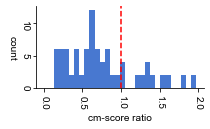

0.7555555555555555 0.24444444444444444


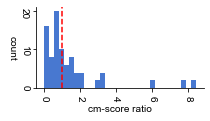

0.5555555555555556 0.4444444444444444


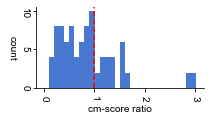

0.6888888888888889 0.3111111111111111


In [37]:
for tmparr,savename in zip([score_matrix_morpho_axon,score_matrix_morpho_den,score_matrix_morpho_full],['M_A','M_D','M_F']):
    df_score_matrix_tmp = pd.DataFrame(score_matrix_overlap/tmparr,index=clustermap_ctlist,columns=clustermap_ctlist)
    df_score_matrix_tmp = df_score_matrix_tmp.dropna(how='all',axis=0)
    df_score_matrix_tmp = df_score_matrix_tmp.dropna(how='all',axis=1)
    # sns.heatmap(df_score_matrix_tmp,cmap='jet',vmin=0,center=1,robust=True,square=True,annot=True,fmt='.2f')
    np.fill_diagonal(df_score_matrix_tmp.values,-1)

    fig = plt.figure(figsize=(3,1.5))
    ax=fig.add_subplot(111)
    ax.hist(df_score_matrix_tmp.values.flatten(),bins=30, range=(0,np.percentile(df_score_matrix_tmp.values.flatten(),98,interpolation='nearest')),color=sns.color_palette('muted')[0],label='All',alpha=1.0)
    # ax.hist(candidate_decay, bins=100, range=(0,np.percentile(df_score_matrix_tmp.values.flatten(),99)),color=sns.color_palette('muted')[1],label='Boxed',alpha=1.0)
    plt.axvline(1,color='r',ls='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    lg1=ax.bar(1,0,color=sns.color_palette('muted')[0])
    # lg2=ax.bar(1,0,color=sns.color_palette('muted')[1])
    plt.yticks(rotation=270)
    plt.xticks(rotation=270)
    plt.xlabel('cm-score ratio',rotation=0)
    plt.ylabel('count',rotation=270,loc='center',verticalalignment='top')
    # plt.legend([lg1,lg2], ['label1','label2'])
    # plt.legend()
    # plt.savefig(f'./fig3/flipped/similarity_ratio_histogram_SFig_{savename}.svg', dpi=400, bbox_inches='tight',facecolor='w')
    plt.show()
    
    v1,v2=np.sum((df_score_matrix_tmp.values>=0)&(df_score_matrix_tmp.values<=1)),np.sum(df_score_matrix_tmp.values>1)
    print(v1/(v1+v2),v2/(v1+v2))

# Histogram of decay

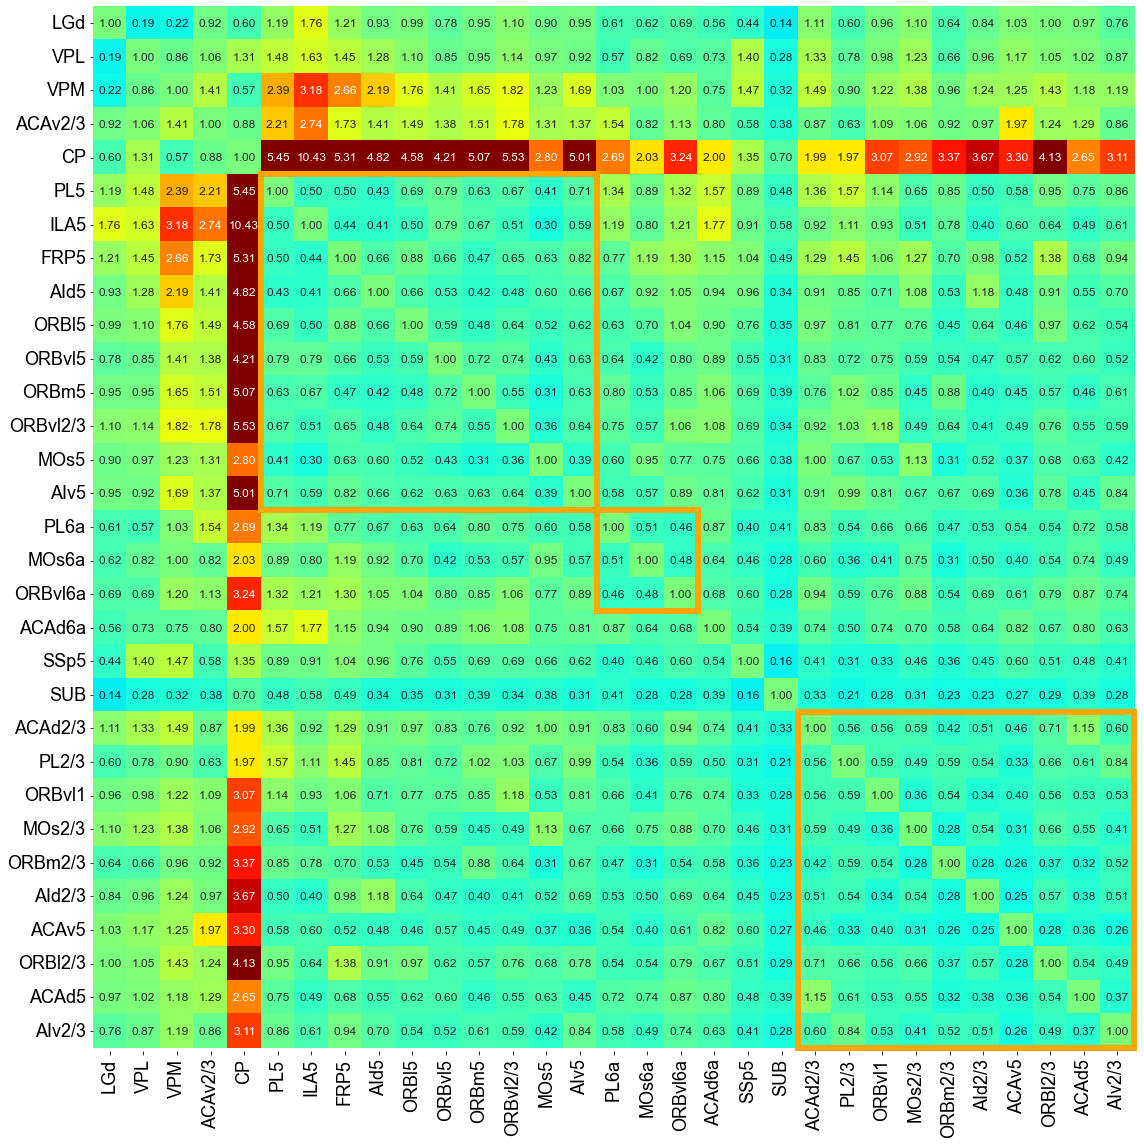

In [101]:
df_decay = df_score_matrix_overlap/df_score_matrix_morpho.loc[df_score_matrix_overlap.index,df_score_matrix_overlap.columns]
df_decay.to_csv(r'./fig3/cm_score.csv')

plt.figure(figsize=(16,16))
g=sns.heatmap(df_decay,annot=True,annot_kws={'fontsize':12},
            square=True,cmap='jet',cbar=False,cbar_kws={'shrink':0.6,'orientation':'vertical',}, fmt='.2f',vmin=0,center=1,robust=True)
color='orange'
lw=6
# unflipped
# g.add_patch(plt.Rectangle((5,5),10,10,fill=False,lw=lw,color=color,))
# g.add_patch(plt.Rectangle((15,15),3,3,fill=False,lw=lw,color=color,))
# g.add_patch(plt.Rectangle((21,21),6,6,fill=False,lw=lw,color=color,))
# g.add_patch(plt.Rectangle((27,27),4,4,fill=False,lw=lw,color=color,))
# flipped
g.add_patch(plt.Rectangle((5,5),10,10,fill=False,lw=lw,color=color,))
g.add_patch(plt.Rectangle((15,15),3,3,fill=False,lw=lw,color=color,))
# g.add_patch(plt.Rectangle((25,25),3,3,fill=False,lw=lw,color=color,))
g.add_patch(plt.Rectangle((21,21),10,10,fill=False,lw=lw,color=color,))
g.set_xlim(0,31+0.1)
g.set_ylim(31+0.1,0)

# g.yaxis.set_ticks_position('right')
# g.yaxis.set_tick_params(rotation=0)
g.set_xticklabels(g.get_xticklabels(),fontsize=18,horizontalalignment='center')
g.set_yticklabels(g.get_yticklabels(),fontsize=18,verticalalignment='center')

# # Extract the colorbar
# cbar = g.collections[0].colorbar
# # Remove the heatmap axes
# g.figure.delaxes(g)
# cbar.ax.tick_params(labelsize=18)

plt.tight_layout()

plt.savefig('./fig3/similarity_ratio.svg', dpi=250, bbox_inches='tight',facecolor='w')
# plt.savefig('./fig3/similarity_ratio_withcbar.svg', dpi=250, bbox_inches='tight',facecolor='w')
plt.show()


In [68]:
from itertools import product
# unflipped
# candidate_list = list(product(np.arange(5,15),np.arange(5,15)))+list(product(np.arange(15,18),np.arange(15,18)))+list(product(np.arange(21,27),np.arange(21,27)))+list(product(np.arange(27,31),np.arange(27,31)))
# flipped
candidate_list = list(product(np.arange(5,15),np.arange(5,15)))+list(product(np.arange(15,18),np.arange(15,18)))+list(product(np.arange(21,31),np.arange(21,31)))
for i in range(len(candidate_list)-1,-1,-1):
    if candidate_list[i][0]==candidate_list[i][1]:
        candidate_list.remove(candidate_list[i])
print(len(candidate_list))

186


In [69]:
candidate_decay = []
for i,j in candidate_list:
    candidate_decay.append(df_decay.iloc[i,j])

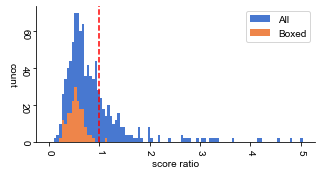

In [70]:
np.fill_diagonal(df_decay.values,-1)

fig = plt.figure(figsize=(5,2.5))
ax=fig.add_subplot(111)
ax.hist(df_decay.values.flatten(),bins=100, range=(0,np.percentile(df_decay.values.flatten(),99)),color=sns.color_palette('muted')[0],label='All',alpha=1.0)
ax.hist(candidate_decay, bins=100, range=(0,np.percentile(df_decay.values.flatten(),99)),color=sns.color_palette('muted')[1],label='Boxed',alpha=1.0)
plt.axvline(1,color='r',ls='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lg1=ax.bar(1,0,color=sns.color_palette('muted')[0])
lg2=ax.bar(1,0,color=sns.color_palette('muted')[1])
plt.yticks(rotation=270)
plt.xticks(rotation=270)
plt.xlabel('score ratio',rotation=0)
plt.ylabel('count',rotation=270,loc='center',verticalalignment='top')
# plt.legend([lg1,lg2], ['label1','label2'])
plt.legend()
plt.savefig('./fig3/similarity_ratio_histogram.svg', dpi=400, bbox_inches='tight',facecolor='w')
plt.show()



In [71]:
df_jointplot = pd.DataFrame(columns=['m-score','c-score','class'])
count=0

for idx in df_score_matrix_overlap.index:
    for col in df_score_matrix_overlap.columns:
        if idx==col: continue
        df_jointplot.loc[count] = [df_score_matrix_morpho.loc[idx,col], df_score_matrix_overlap.loc[idx,col],'All']
        count+=1
        
for xidx,yidx in candidate_list:
    idx,col = clustermap_ctlist[xidx], clustermap_ctlist[yidx]
    df_jointplot.loc[count] = [df_score_matrix_morpho.loc[idx,col], df_score_matrix_overlap.loc[idx,col],'Boxed']
    count+=1


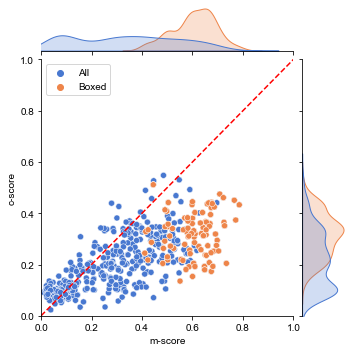

In [72]:
g = sns.jointplot(x='m-score', y='c-score', data=df_jointplot,
                  kind="scatter", hue='class',
                  xlim=(0, 1), ylim=(0, 1),
                  # color=s_color, 
                  height=5,palette='muted',marginal_kws={'common_norm':0})
g.ax_joint.plot((0,1),(0,1),ls='--',color='red')
g.ax_joint.legend_.set_title("")
plt.savefig('./fig3/similarity_ratio_jointplot.svg', dpi=300, bbox_inches='tight',facecolor='w')
plt.show()


(140,)


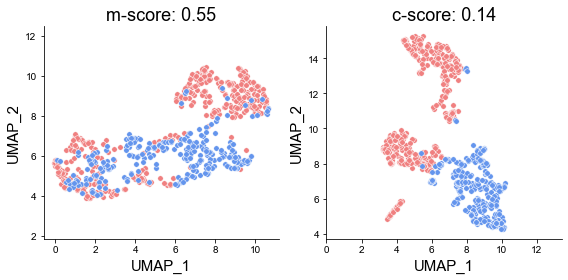

(134,)


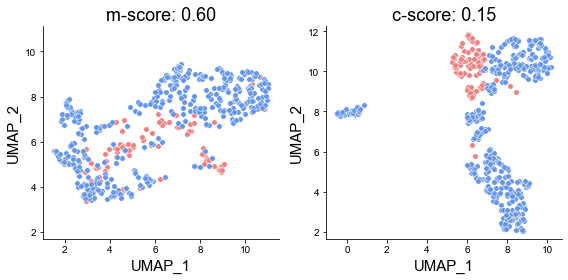

(123,)


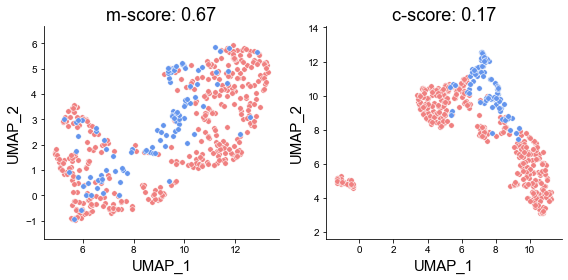

(137,)


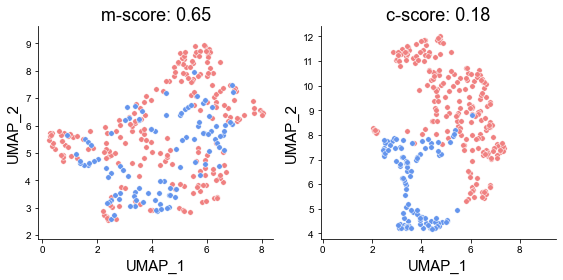

(126,)


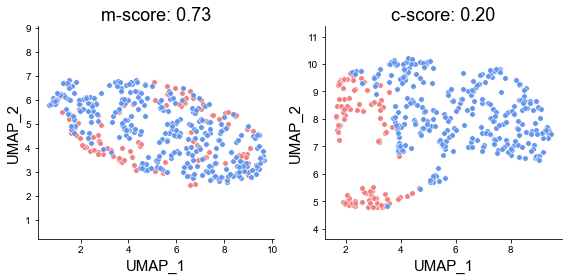

(139,)


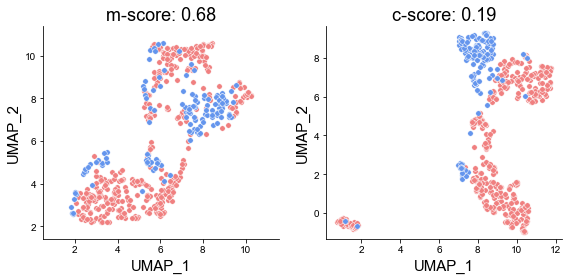

(141,)


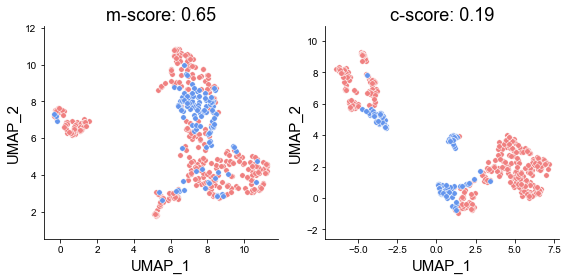

(140,)


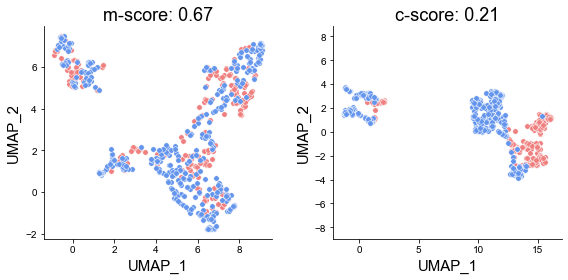

(140,)


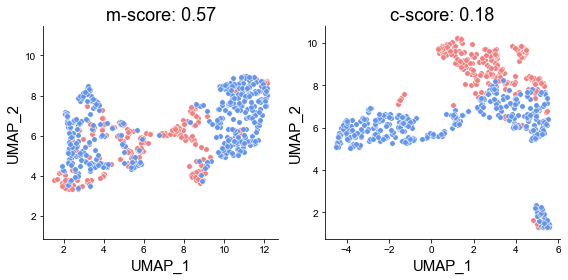

(137,)


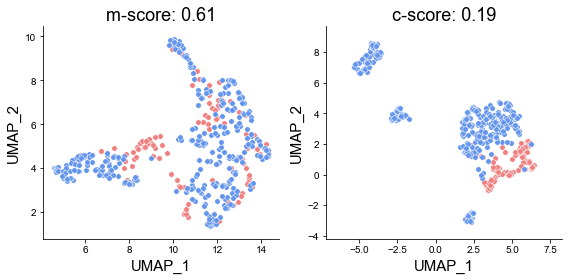

(136,)


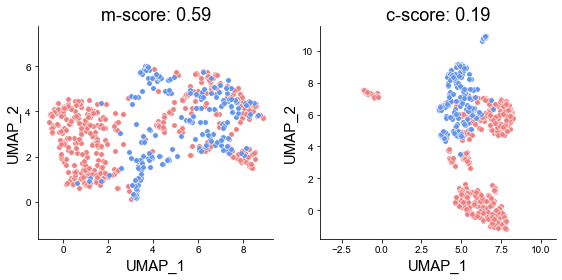

(131,)


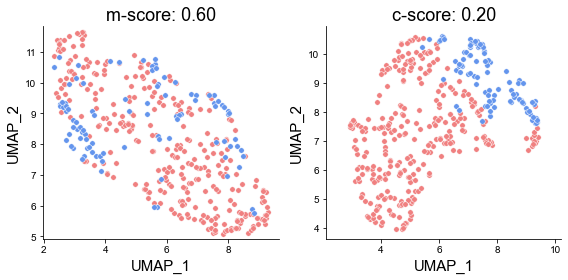

In [ ]:
sampling_idx = np.array(candidate_list)[np.argsort(candidate_decay)[:24]]

for i in range(0,len(sampling_idx),2):
    fig=plt.figure(figsize=(8,4))

    xidx,yidx = sampling_idx[i]
    i = i//2
    ct1, ct2 = clustermap_ctlist[xidx], clustermap_ctlist[yidx]
    
    # connectivity
    col_indice = np.argwhere(df_overlap[df_overlap['celltype'].isin([ct1,ct2])].iloc[:,:-1].values.sum(axis=0)>0).flatten()
    print(col_indice.shape)
    dataset1_c = df_overlap[df_overlap['celltype']==ct1].iloc[:,:-1].values[:,col_indice]
    dataset2_c = df_overlap[df_overlap['celltype']==ct2].iloc[:,:-1].values[:,col_indice]
    ump_c = umap.UMAP(random_state=520812)
    gaga_c = np.vstack([dataset1_c, dataset2_c])
    gaga_c = (gaga_c-gaga_c.mean(axis=0)) / (gaga_c.std(axis=0)+1e-20)
    result_c = ump_c.fit_transform(gaga_c)
    
    # morphology
    dataset1_m = df_axon.loc[df_ct[df_ct['Detail CellType']==ct1].index].values
    dataset2_m = df_axon.loc[df_ct[df_ct['Detail CellType']==ct2].index].values
    ump_m = umap.UMAP(random_state=520812)
    gaga_m = np.vstack([dataset1_m, dataset2_m])
    gaga_m = (gaga_m-gaga_m.mean(axis=0)) / (gaga_m.std(axis=0)+1e-20)
    result_m = ump_m.fit_transform(gaga_m)
    
    
    ax=fig.add_subplot(1,2,1)
    ax.set_aspect('equal', adjustable='datalim')
    plt.title('m-score: {:.2f}'.format(np.round(pd.DataFrame(score_matrix_morpho,index=ctlist,columns=ctlist).loc[ct1,ct2],2)),
             fontsize=18)
    lg1=plt.scatter(result_m[:len(dataset1_m),0],result_m[:len(dataset1_m),1],s=30,label=ct1,lw=0.5,edgecolor='w',color='lightcoral')
    lg2=plt.scatter(result_m[len(dataset1_m):,0],result_m[len(dataset1_m):,1],s=30,label=ct2,lw=0.5,edgecolor='w',color='cornflowerblue')
    # plt.legend([lg1,lg2],[ct1,ct2],loc='best')
    plt.xlabel('UMAP_1',fontsize=15)
    plt.ylabel('UMAP_2',fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
    ax=fig.add_subplot(1,2,2)
    ax.set_aspect('equal', adjustable='datalim')
    plt.title('c-score: {:.2f}'.format(np.round(pd.DataFrame(score_matrix_overlap,index=clustermap_ctlist,columns=clustermap_ctlist).loc[ct1,ct2],2)),
             fontsize=18)
    lg1=plt.scatter(result_c[:len(dataset1_c),0],result_c[:len(dataset1_c),1],s=30,label=ct1,lw=0.5,edgecolor='w',color='lightcoral')
    lg2=plt.scatter(result_c[len(dataset1_c):,0],result_c[len(dataset1_c):,1],s=30,label=ct2,lw=0.5,edgecolor='w',color='cornflowerblue')
    # plt.legend([lg1,lg2],[ct1,ct2],loc='best')
    plt.xlabel('UMAP_1',fontsize=15)
    plt.ylabel('UMAP_2',fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    # plt.suptitle(ct1+' & '+ct2 +'\n'+'similarity score ratio: '+str(np.round(df_decay.iloc[xidx,yidx],2)),fontsize=13)
    plt.savefig('./fig3/pairwise_umap/{2}_{0}_{1}.svg'.format(ct1.replace('2/3','23'),ct2.replace('2/3','23'),str(np.round(df_decay.iloc[xidx,yidx],3))), dpi=300, bbox_inches='tight',facecolor='w')
    plt.show()
    
    # break